In [2]:
from whisperweranalysis.structure import HvdSet
from whisperweranalysis.groundtruth import hvd_sentences

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
hvd_set1 = HvdSet(1, hvd_sentences)

In [5]:
hvd_set1.compute_wer('/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/whisperweranalysis/transcription')

In [6]:
from whisperweranalysis.structure import MultipleSets
hvd_sets = MultipleSets('/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/whisperweranalysis/transcription')

In [20]:
hvd_sets[0]

HvdSet(72, 711, 720)

In [30]:
sets = [x[0] for x in hvd_sets.get_all_models_wer()['Glow'][:10]]

In [32]:
from whisperweranalysis.utilities import get_all_values


systems_glow_adv = get_all_values([hvd_sets[x] for x in sets])

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


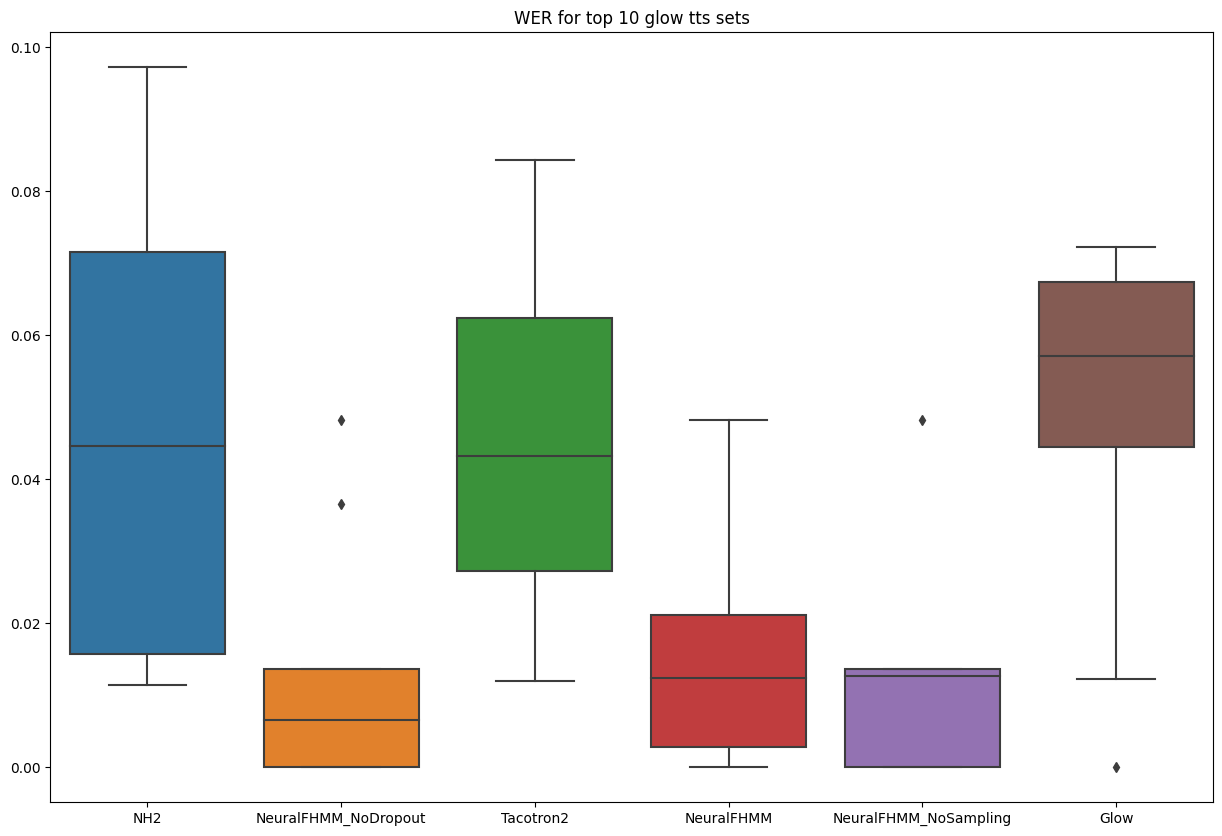

In [35]:


df = pd.DataFrame.from_dict(systems_glow_adv)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('WER for top 10 glow tts sets')
sns.boxplot(data=df, ax=ax)
plt.show()

In [10]:
top_10 = hvd_sets.get_top_n(10)

In [11]:
from whisperweranalysis.utilities import get_statistics_of_wer, get_all_values
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
top_10

[HvdSet(13, 121, 130),
 HvdSet(31, 301, 310),
 HvdSet(47, 461, 470),
 HvdSet(49, 481, 490),
 HvdSet(50, 491, 500),
 HvdSet(51, 501, 510),
 HvdSet(58, 571, 580),
 HvdSet(63, 621, 630),
 HvdSet(67, 661, 670),
 HvdSet(72, 711, 720)]

In [25]:
top_10[4], top_10[4].transcriptions

(HvdSet(50, 491, 500),
 {'NH2': ['A man in a blue sweater sat at the desk.',
   'Ups are a food eaten by horse and man.',
   'Their eyelids droop for want of sleep.',
   'A sip of tea revives his tired friend.',
   'There are many ways to do these things.',
   'Tuck the sheet under the edge of the mat.',
   'a force equal to that would move the Earth.',
   'We like to see clear weather.',
   'the work of the tailor is seen on each side.',
   'Take a chance and win a China doll.'],
  'NeuralFHMM_NoDropout': ['A man in a blue sweater sat at the desk.',
   'Oats are a food eaten by horse and man.',
   'Their eyelids droop for want of sleep.',
   'A sip of tea revives his tired friend.',
   'There are many ways to do these things.',
   'Tuck the sheet under the edge of the mat.',
   'A force equal to that would move the Earth.',
   'We like to see clear weather.',
   'The work of the tailor is seen on each side.',
   'Take a chance and win a China doll.'],
  'Tacotron2': ['A man in a blue 

In [29]:
get_statistics_of_wer(hvd_sets)

({'NH2': 0.05739611108255389,
  'NeuralFHMM_NoDropout': 0.030771643227601866,
  'Tacotron2': 0.06360939798900696,
  'NeuralFHMM': 0.031270758821639384,
  'NeuralFHMM_NoSampling': 0.0221044557496172,
  'Glow': 0.11572721721339116},
 {'NH2': 0.03446396860764035,
  'NeuralFHMM_NoDropout': 0.022665125871859614,
  'Tacotron2': 0.03143415080361446,
  'NeuralFHMM': 0.026930398165634306,
  'NeuralFHMM_NoSampling': 0.018439383673575855,
  'Glow': 0.043827141384726334})

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


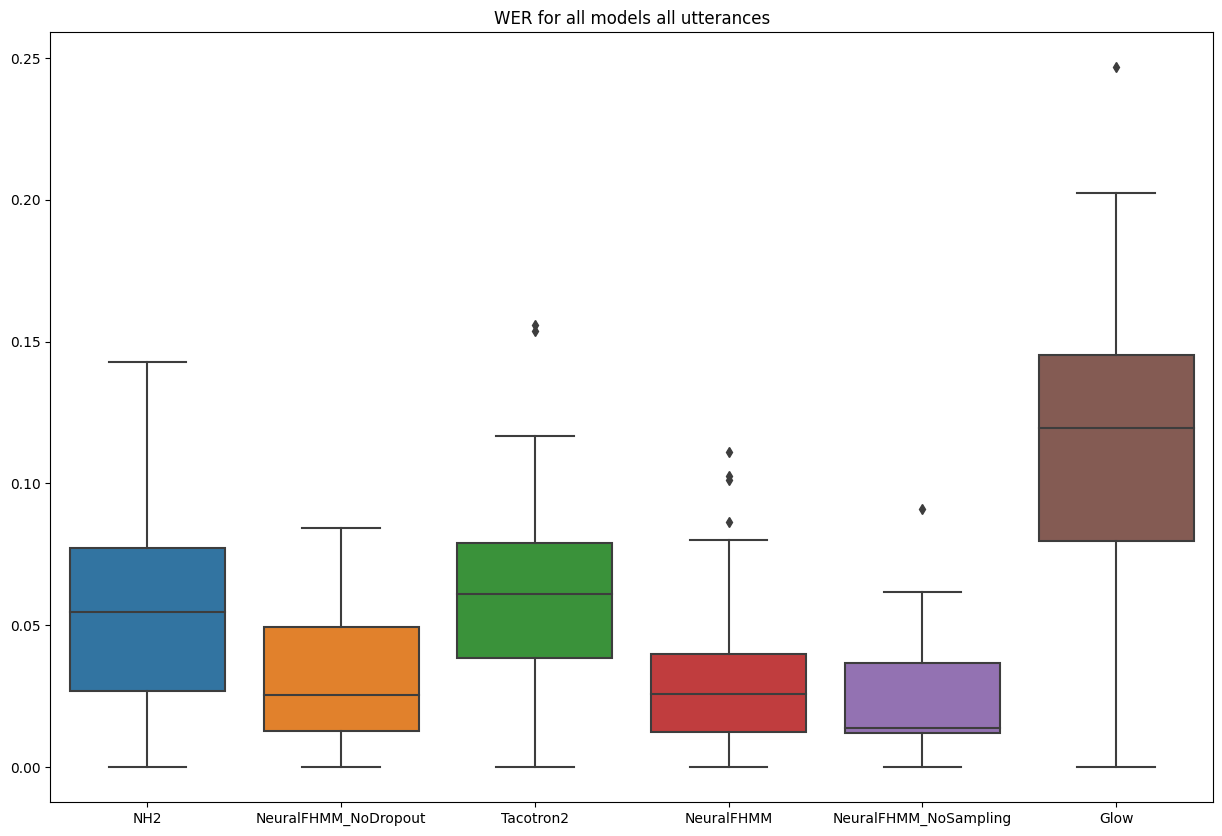

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


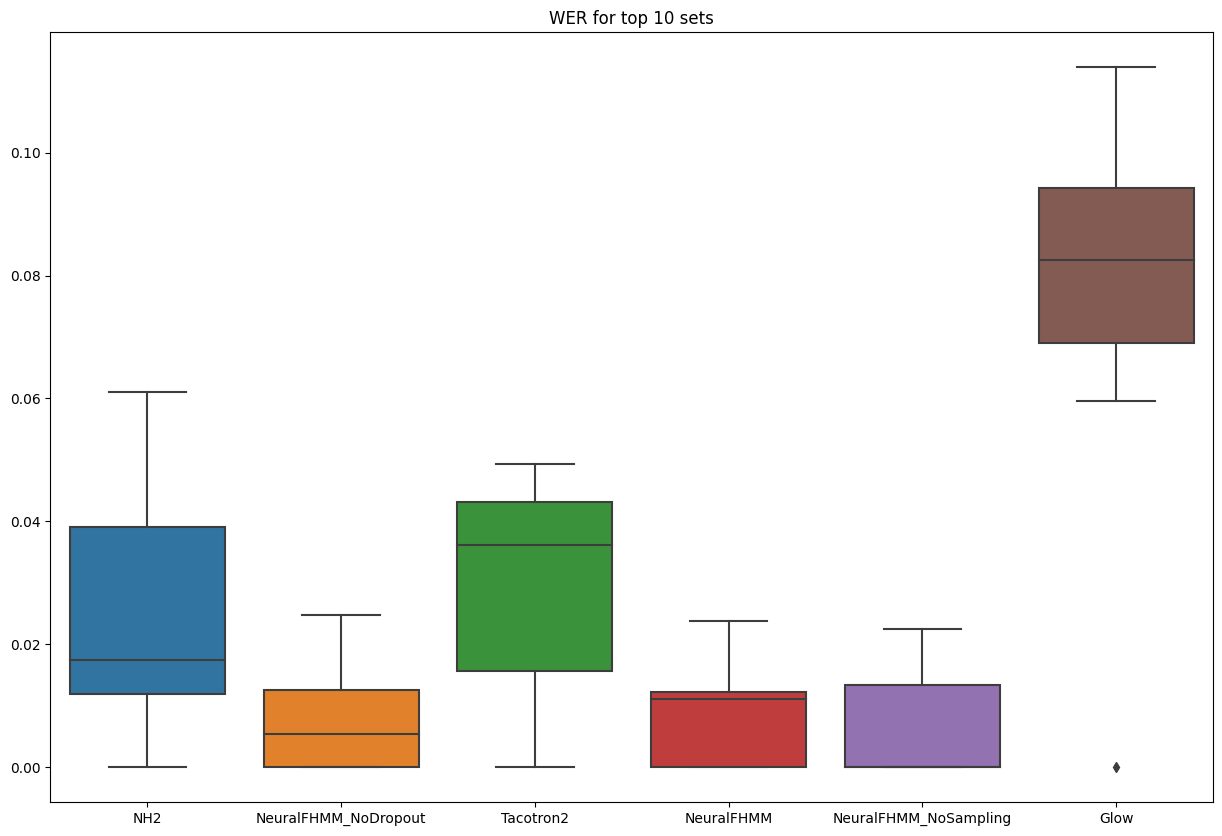

In [42]:
all_wer = get_all_values(hvd_sets)
df = pd.DataFrame.from_dict(all_wer)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('WER for all models all utterances')
sns.boxplot(data=df, ax=ax)
plt.show()




top_10_wer = get_all_values(top_10)
df = pd.DataFrame.from_dict(top_10_wer)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('WER for top 10 sets')
sns.boxplot(data=df, ax=ax)
plt.show()

In [22]:
get_statistics_of_wer(hvd_sets)

({'NH2': 0.05739611108255389,
  'NeuralFHMM_NoDropout': 0.030771643227601866,
  'Tacotron2': 0.06360939798900696,
  'NeuralFHMM': 0.031270758821639384,
  'NeuralFHMM_NoSampling': 0.0221044557496172,
  'Glow': 0.11572721721339116},
 {'NH2': 0.03446396860764035,
  'NeuralFHMM_NoDropout': 0.022665125871859614,
  'Tacotron2': 0.03143415080361446,
  'NeuralFHMM': 0.026930398165634306,
  'NeuralFHMM_NoSampling': 0.018439383673575855,
  'Glow': 0.043827141384726334})

In [13]:
{key: value[3] for key, value in top_10[2].transcriptions.items()}

{'NH2': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM_NoDropout': 'He sent the figs but kept the ripe cherries.',
 'Tacotron2': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM_NoSampling': 'He sent the figs but kept the ripe cherries.',
 'Glow': 'He sent the fakes but kept the rot cherries.'}